# 1. Student Information
- **Name:** Apoorv Gupta
- **PRN:** 21070126018
- **Batch:** AIML - A1
- **Git Repo:** [GitHub Repository](https://github.com/erApoorvGupta/NLP_assignments)

# 1.1. Introduction


# 1.2. Importing the libraries

In [ ]:
# Importing the libraries
# Preprocessing the data using NLTK

# Importing the libraries/////
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
nltk.download('all')

# 1.3. Importing the dataset

In [2]:
df = pd.read_csv(r"/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# 2. Data Preprocessing

In [4]:
df.dropna(inplace=True)

In [5]:
df = df[['Text','Score']].dropna()

In [6]:
df.drop_duplicates(subset=['Text','Score'],keep='first',inplace=True)

In [29]:
def mark_sentiment(Score):
    if(Score<=3):
        return 0
    else:
        return 1

In [ ]:
df['sentiment']=df['Score'].apply(mark_sentiment)

In [10]:
df.drop(['Score'],axis=1,inplace=True) # 

In [13]:
df['sentiment'].value_counts()

1    306812
0     86849
Name: sentiment, dtype: int64

In [14]:
df = df.iloc[:40000]

# 2.1. Lemmatization and Tokenization

In [15]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Defining a function to tokenize and lemmetize the text

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
! unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [17]:
# Applying the function to the text column
df['Text'] = df['Text'].apply(tokenize_and_lemmatize)

# 3. Data Cleaning

# 3.1 Remove stopwords, Remove symbols, Remove URLs

In [18]:
# Data Cleansing: Remove stopwords, remove symbols, remove URLs

# Importing the libraries
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [19]:
# Defining a function to clean the text
def clean_Text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove symbols and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    text = " ".join([word for word in text.split() if word.lower() not in stop_words])
     
    # Remove excess whitespaces
    text = ' '.join(text.split())
    
    # Replace abbreviations (you can add more if needed)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    
    # Fix contractions
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'t", " not", text)
    text = re.sub(r"'ve", " have", text)
    return text

In [20]:
df.rename(columns={'Text': 'text'}, inplace=True)

In [21]:
# Applying the clean Text function to the Text column
df['text'] = df['text'].apply(clean_Text)

# Displaying the first 5 rows of the dataset
df.head()

,text,sentiment
0,bought several Vitality canned dog food produc...,1
1,Product arrived labeled Jumbo Salted Peanuts p...,0
2,confection ha around century light pillowy cit...,1
3,looking secret ingredient Robitussin believe f...,0
4,Great taffy great price wa wide assortment yum...,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 114536
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       100000 non-null  object
 1   sentiment  100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define parameters
batch_size_1 = 4
max_sequence_length_1 = 50
embedding_dim_1 = 50
max_words_1 = 10000
lstm_units_1 = 32

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words_1)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
x = pad_sequences(sequences, maxlen=max_sequence_length_1)
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the first model (1st set of results)
model_1 = Sequential()
model_1.add(Embedding(max_words_1, embedding_dim_1, input_length=max_sequence_length_1))
model_1.add(LSTM(lstm_units_1))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the first model
model_1.fit(x_train, y_train, batch_size=batch_size_1, epochs=20)

# Evaluate the first model
y_pred_1 = model_1.predict(x_test)
y_pred_1 = (y_pred_1 > 0.5)  # Threshold for binary classification

# Generate a classification report for the first model
report_1 = classification_report(y_test, y_pred_1)




/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/20
20000/20000 [==============================] - 147s 7ms/step - loss: 0.3252 - accuracy: 0.8611
Epoch 2/20
20000/20000 [==============================] - 113s 6ms/step - loss: 0.2588 - accuracy: 0.8920
Epoch 3/20
20000/20000 [==============================] - 113s 6ms/step - loss: 0.2200 - accuracy: 0.9102
Epoch 4/20
20000/20000 [==============================] - 111s 6ms/step - loss: 0.1858 - accuracy: 0.9259
Epoch 5/20
20000/20000 [==============================] - 113s 6ms/step - loss: 0.1532 - accuracy: 0.9415
Epoch 6/20
20000/20000 [==============================] - 112s 6ms/step - loss: 0.1221 - accuracy: 0.9541
Epoch 7/20
20000/20000 [==============================] - 108s 5ms/step - loss: 0.0931 - accuracy: 0.9659
Epoch 8/20
20000/20000 [==============================] - 110s 6ms/step - loss: 0.0681 - accuracy: 0.9753
Epoch 9/20
20000/20000 [==============================] - 109s 5ms/step - loss: 0.0511 - accuracy: 0.9816
Epoch 10/20
20000/20000 [=====================

In [24]:
y_pred_1 = model_1.predict(x_test)
y_pred_1 = (y_pred_1 > 0.5)  # Threshold for binary classification

# Generate a classification report for the first model
report_1 = classification_report(y_test, y_pred_1)
print("Classification Report for Model 1:")
print(report_1)

625/625 [==============================] - 2s 2ms/step
Classification Report for Model 1:
              precision    recall  f1-score   support

           0       0.68      0.65      0.66      4597
           1       0.90      0.91      0.90     15403

    accuracy                           0.85     20000
   macro avg       0.79      0.78      0.78     20000
weighted avg       0.85      0.85      0.85     20000



In [25]:
# Define parameters
batch_size_2 = 8
max_sequence_length_2 = 30
embedding_dim_2 = 30
max_words_2 = 25000
lstm_units_2 = 32

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words_2)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
x = pad_sequences(sequences, maxlen=max_sequence_length_2)
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# # Define the model
# model_2 = Sequential()
# model_2.add(Embedding(max_words_2, embedding_dim_2, input_length=max_sequence_length_2))
# model_2.add(LSTM(lstm_units_2, return_sequences=True))
# model_2.add(LSTM(lstm_units_2))
# model_2.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model (assuming you have 'sentiment' as your target column)
# model_2.fit(x, y, batch_size=batch_size_2, epochs=5)
model_2 = Sequential()
model_2.add(Embedding(max_words_2, embedding_dim_2, input_length=max_sequence_length_2))
model_2.add(LSTM(lstm_units_2, return_sequences=True))
model_2.add(LSTM(lstm_units_2))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the second model
model_2.fit(x_train, y_train, batch_size=batch_size_2, epochs=20)

# Evaluate the second model
y_pred_2 = model_2.predict(x_test)
y_pred_2 = (y_pred_2 > 0.5)  # Threshold for binary classification

# Generate a classification report for the second model
report_2 = classification_report(y_test, y_pred_2)


Epoch 1/20
10000/10000 [==============================] - 94s 9ms/step - loss: 0.3421 - accuracy: 0.8529
Epoch 2/20
10000/10000 [==============================] - 70s 7ms/step - loss: 0.2692 - accuracy: 0.8880
Epoch 3/20
10000/10000 [==============================] - 71s 7ms/step - loss: 0.2207 - accuracy: 0.9101
Epoch 4/20
10000/10000 [==============================] - 70s 7ms/step - loss: 0.1762 - accuracy: 0.9309
Epoch 5/20
10000/10000 [==============================] - 71s 7ms/step - loss: 0.1362 - accuracy: 0.9475
Epoch 6/20
10000/10000 [==============================] - 70s 7ms/step - loss: 0.0999 - accuracy: 0.9632
Epoch 7/20
10000/10000 [==============================] - 70s 7ms/step - loss: 0.0705 - accuracy: 0.9748
Epoch 8/20
10000/10000 [==============================] - 70s 7ms/step - loss: 0.0495 - accuracy: 0.9827
Epoch 9/20
10000/10000 [==============================] - 70s 7ms/step - loss: 0.0336 - accuracy: 0.9885
Epoch 10/20
10000/10000 [==============================

In [26]:
print("Classification Report for Model 2:")
print(report_2)

Classification Report for Model 2:
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      4597
           1       0.88      0.89      0.89     15403

    accuracy                           0.82     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.82      0.82      0.82     20000



625/625 [==============================] - 2s 3ms/step


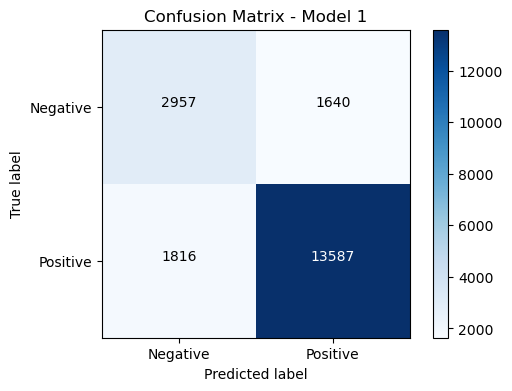

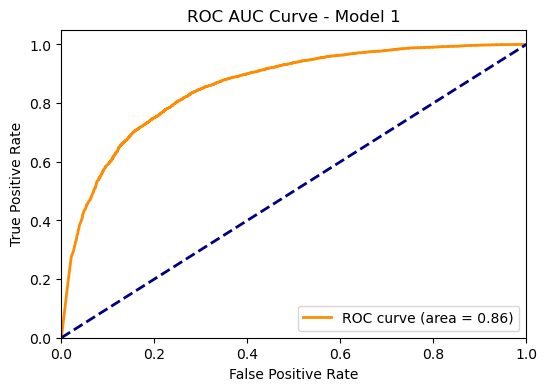

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    classes = ["Negative", "Positive"]  # Assuming 0 is negative and 1 is positive
    tick_marks = [0, 1]
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    for i in range(2):
        for j in range(2):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    plt.show()

# Function to plot ROC AUC curve
def plot_roc_auc(y_true, y_score, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Assuming you have already trained model_1 and model_2 as mentioned earlier

# Predict probabilities for both models
y_score_1 = model_1.predict(x_test)
y_score_2 = model_2.predict(x_test)

# Threshold for binary classification
y_pred_1 = (y_score_1 > 0.5)
y_pred_2 = (y_score_2 > 0.5)


In [ ]:
# Plot confusion matrix and ROC AUC curve for Model 1
plot_confusion_matrix(y_test, y_pred_1, title="Confusion Matrix - Model 1")
plot_roc_auc(y_test, y_score_1, title="ROC AUC Curve - Model 1")

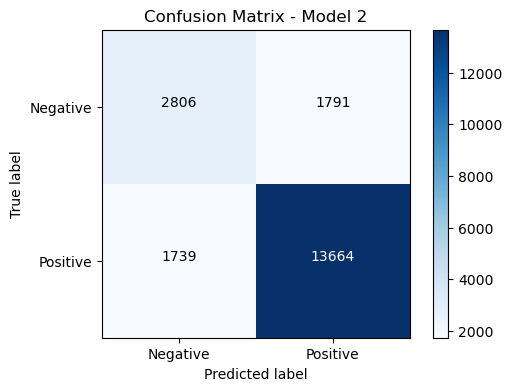

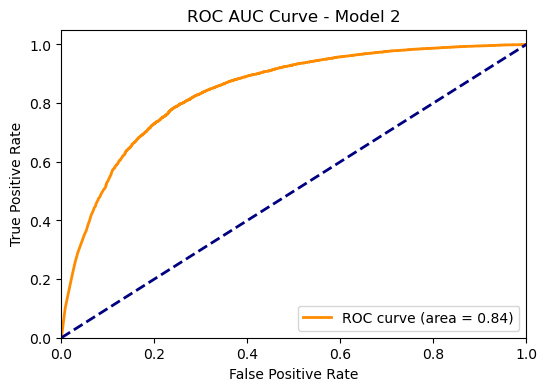

In [28]:

# Plot confusion matrix and ROC AUC curve for Model 2
plot_confusion_matrix(y_test, y_pred_2, title="Confusion Matrix - Model 2")
plot_roc_auc(y_test, y_score_2, title="ROC AUC Curve - Model 2")

Certainly! Let's analyze the classification reports for Model 1 and Model 2:



Model 1:
Precision for Class 0 (0.68): This means that when Model 1 predicts a sample as Class 0, it is correct 68% of the time.
Recall for Class 0 (0.65): Model 1 correctly identifies 65% of all actual Class 0 samples.
F1-Score for Class 0 (0.66): The F1-score is the harmonic mean of precision and recall. It gives a balanced measure of a model's performance. An F1-score of 0.66 for Class 0 indicates a reasonable balance between precision and recall.
Precision for Class 1 (0.90): Model 1's precision for Class 1 is quite high, indicating that when it predicts Class 1, it is correct 90% of the time.
Recall for Class 1 (0.91): Model 1 correctly identifies 91% of all actual Class 1 samples.
F1-Score for Class 1 (0.90): The F1-score for Class 1 is high, indicating a strong balance between precision and recall for Class 1.
Accuracy (0.85): Model 1's overall accuracy is 85%, meaning it correctly predicts 85% of all samples.
Macro Avg F1-Score (0.78): The macro-average F1-score is the average of the F1-scores for both classes. It gives equal weight to both classes. In this case, it's 0.78.
Weighted Avg F1-Score (0.85): The weighted average F1-score takes into account class imbalance. Since Class 1 has more samples, it has a greater influence on the weighted average. The weighted F1-score is 0.85.





Model 2:
Precision for Class 0 (0.62): Model 2's precision for Class 0 is lower compared to Model 1, indicating that it is less accurate when predicting Class 0.
Recall for Class 0 (0.61): Model 2 correctly identifies 61% of all actual Class 0 samples.
F1-Score for Class 0 (0.61): The F1-score for Class 0 is relatively low, indicating a trade-off between precision and recall.
Precision for Class 1 (0.88): Model 2's precision for Class 1 is high, indicating that it is accurate when predicting Class 1.
Recall for Class 1 (0.89): Model 2 correctly identifies 89% of all actual Class 1 samples.
F1-Score for Class 1 (0.89): The F1-score for Class 1 is high, indicating a good balance between precision and recall for Class 1.
Accuracy (0.82): Model 2's overall accuracy is 82%, which is slightly lower than Model 1.
Macro Avg F1-Score (0.75): The macro-average F1-score for Model 2 is 0.75, indicating that it performs slightly worse in terms of overall balance between precision and recall compared to Model 1.
Weighted Avg F1-Score (0.82): The weighted average F1-score is 0.82, which considers class imbalance and is higher than the macro-average F1-score.
Analysis:

Model 1 outperforms Model 2 in terms of precision, recall, and F1-scores for both classes (0 and 1).
Model 2 has lower overall accuracy compared to Model 1.
Model 2 has a slight imbalance in class performance, with Class 1 being predicted more accurately than Class 0.
Model 1 is generally a better-performing model based on these classification metrics and should be preferred if you prioritize balanced performance between the two classes. However, further analysis, such as feature importance or domain-specific considerations, may be necessary to make a final decision on model selection.